<a href="https://colab.research.google.com/github/uditi13/Synapse_Tasks/blob/master/Task_2_Bicycle_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas.testing as tm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [1]:
from google.colab import files
uploaded = files.upload()

Saving data.json to data.json


In [3]:
df = pd.read_json("//content//data.json", orient = 'split')

In [4]:
print(df)

          category  ... amount
0           Sports  ...    NaN
1       Technology  ...    NaN
2      Environment  ...    NaN
3       Technology  ...    NaN
4           Sports  ...    NaN
...            ...  ...    ...
49995       Sports  ...   35.0
49996   Technology  ...    NaN
49997      Fashion  ...    NaN
49998       Sports  ...   37.0
49999      Fashion  ...    NaN

[50000 rows x 10 columns]


In [5]:
df.head(10)

,category,event_name,gender,age,marital_status,session_id,device,client_time,location,amount
0,Sports,View Project,M,18-24,married,69f62d2ae87640f5a2dde2b2e9229fe6,android,2014-03-01 00:00:04,"{'latitude': 40.189788, 'city': 'Lyons', 'stat...",NaN
1,Technology,View Project,M,18-24,single,4459d001feb8438eae5f4ec24abcd992,iOS,2014-03-01 00:00:22,"{'latitude': 33.844371, 'city': 'Alpharetta', ...",NaN
2,Environment,View Project,M,55+,single,0db9ed700a184d48a9d04806696e3642,iOS,2014-03-01 00:00:32,"{'latitude': 42.446396, 'city': 'Westford', 's...",NaN
3,Technology,View Project,M,18-24,single,68195e2372bd4022b17220fc21de9138,android,2014-03-01 00:00:38,"{'latitude': 44.624413, 'city': 'Saranac', 'st...",NaN
4,Sports,View Project,F,25-34,married,9508a8385dc94773baba8aa7d1c2aa75,iOS,2014-03-01 00:00:51,"{'latitude': 36.747083, 'city': 'Lampe', 'stat...",NaN
5,Fashion,View Project,F,45-54,married,d420e0e6927c4bebaa580e99b00e52e9,iOS,2014-03-01 00:01:04,"{'latitude': 41.47225, 'city': 'Cleveland', 's...",NaN
6,Games,View Project,F,35-44,single,0e00548eb6a54d2f8dbe2bdf6c8efb80,iOS,2014-03-01 00:02:17,"{'latitude': 40.71924, 'city': 'Middle Village...",NaN
7,Technology,View Project,F,35-44,married,c6f18d84b43b4a4a90fa9a44016c3665,android,2014-03-01 00:02:18,"{'latitude': 37.103768, 'city': 'Los Banos', '...",NaN
8,Fashion,View Project,F,45-54,married,2eb996fba97548b88f8ea5ec2484b34b,iOS,2014-03-01 00:02:25,"{'latitude': 41.040988, 'city': 'Rochester', '...",NaN
9,Technology,View Project,F,45-54,married,e040fa23c3f84ad58ca59f1552fa3f0b,iOS,2014-03-01 00:02:39,"{'latitude': 40.203459, 'city': 'Newtown', 'st...",NaN


Bar graph of event_name


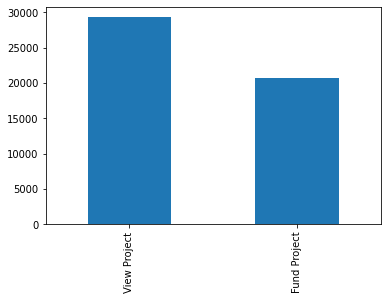

In [6]:
df['event_name'].value_counts().plot(kind='bar')

**Null** **Values**

In [7]:
print('Data columns with null values:\n',df.isnull().sum())

Data columns with null values:
 category              0
event_name            0
gender                0
age                   0
marital_status        0
session_id            0
device                0
client_time           0
location              0
amount            29342
dtype: int64


**Dropping Null values from Amount as we need the people who would invest**

In [8]:
df1 = df.dropna()

In [9]:
print(df1)

          category  ... amount
11         Fashion  ...   61.0
16          Sports  ...   31.0
18      Technology  ...   39.0
25      Technology  ...   36.0
35          Sports  ...   40.0
...            ...  ...    ...
49989       Sports  ...   37.0
49992      Fashion  ...   25.0
49994  Environment  ...   35.0
49995       Sports  ...   35.0
49998       Sports  ...   37.0

[20658 rows x 10 columns]


In [10]:
df1.shape

(20658, 10)

In [11]:
df2 = df['amount'].dropna()

In [12]:
print(df2)

11       61.0
16       31.0
18       39.0
25       36.0
35       40.0
         ... 
49989    37.0
49992    25.0
49994    35.0
49995    35.0
49998    37.0
Name: amount, Length: 20658, dtype: float64


In [13]:
df1['category'].unique()

array(['Fashion', 'Sports', 'Technology', 'Games', 'Environment'],
      dtype=object)

In [14]:
df1.columns

Index(['category', 'event_name', 'gender', 'age', 'marital_status',
       'session_id', 'device', 'client_time', 'location', 'amount'],
      dtype='object')

**Filtering Category having Sports or Environment**

In [15]:
df3 = df1.query('category in ["Sports", "Environment"]')


In [16]:
df3.groupby('category')[['amount']].mean()

,amount
category,
Environment,39.710443
Sports,39.130893


In [17]:
df3['event_name'].value_counts()

Fund Project    8268
Name: event_name, dtype: int64

In [18]:
gender = pd.crosstab(index    = df3['gender'],
                     columns  = 'count')

print(gender)

col_0   count
gender       
F        3893
M        3751
U         624


**Bar Plot of Age,Gender vs amount (sum)**

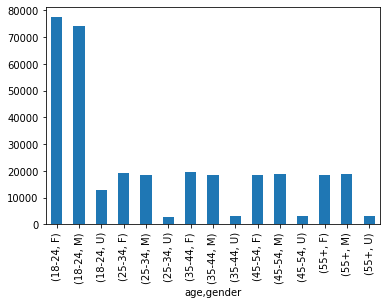

In [20]:
df3.groupby(['age','gender'])['amount'].aggregate(sum).plot(kind='bar')

In [21]:
df4 = pd.concat([df3, df3['location'].apply(pd.Series)], axis = 1).drop('location', axis = 1)


In [22]:
df4.head(10)

,category,event_name,gender,age,marital_status,session_id,device,client_time,amount,latitude,city,state,longitude,zip_code
16,Sports,Fund Project,M,18-24,married,69f62d2ae87640f5a2dde2b2e9229fe6,android,2014-03-01 00:03:20,31.0,40.189788,Lyons,CO,-105.355280,80540
35,Sports,Fund Project,M,18-24,married,be389e9be0e74398adcef3292ac409ee,android,2014-03-01 00:06:35,40.0,45.408374,Lake Oswego,OR,-122.691388,97034
78,Sports,Fund Project,F,18-24,single,71ca342ead4f4da180da4f9b4baaf760,android,2014-03-01 00:18:38,53.0,33.844371,Alpharetta,GA,-84.474050,30009
100,Sports,Fund Project,F,18-24,married,a1fdfe0bebed4510a9059bcfb3ba1325,iOS,2014-03-01 00:24:18,48.0,33.794055,Atlanta,GA,-84.377326,30308
131,Sports,Fund Project,M,45-54,single,d23a964e8656403b853eb2a24139c408,android,2014-03-01 00:31:01,27.0,39.102704,Kansas City,MO,-94.595033,64105
183,Sports,Fund Project,F,25-34,married,9508a8385dc94773baba8aa7d1c2aa75,iOS,2014-03-01 00:42:17,31.0,36.747083,Lampe,MO,-93.458626,65681
191,Environment,Fund Project,U,35-44,single,c77ef08290084a41b832e365ecb6ca2a,iOS,2014-03-01 00:43:27,27.0,27.420316,Okeechobee,FL,-80.945361,34972
205,Sports,Fund Project,M,18-24,single,95ea20d2293542b7afacfae80b3ddcbb,android,2014-03-01 00:49:05,39.0,45.408374,Lake Oswego,OR,-122.691388,97034
215,Environment,Fund Project,F,18-24,single,6376b261544043afa60465337704aaca,android,2014-03-01 00:51:20,50.0,33.834989,Atlanta,GA,-84.386826,30305
289,Sports,Fund Project,M,35-44,married,0d3a9a26b122463f85f829f61d3cf3c1,iOS,2014-03-01 01:08:33,46.0,40.867036,Denver,IN,-86.075240,46926


In [ ]:
pip install git+git://github.com/geopandas/geopandas.git

**Locations shown on the Map**

The locations of the people surveyed: 


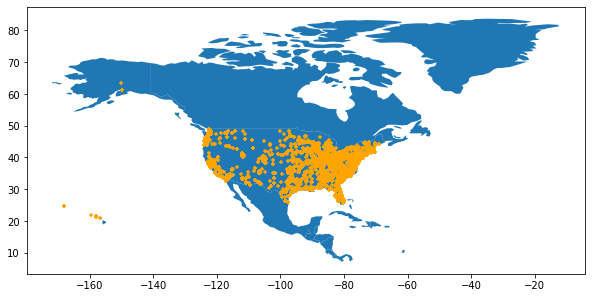

In [24]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
print('The locations of the people surveyed: ')
geometry = [Point(xy) for xy in zip(df4['longitude'], df4['latitude'])]
g_df = GeoDataFrame(df4, geometry=geometry)   

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
g_df.plot(ax=world[world.continent == 'North America'].plot(figsize=(10, 6)), marker='+', color='orange', markersize=12);

In [25]:
df4['marital_status'].value_counts()

married    5393
single     2875
Name: marital_status, dtype: int64

**Bar Plot of marital_status and amount**

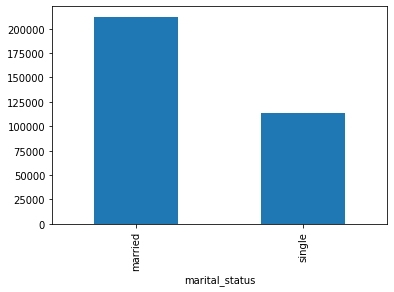

In [26]:
df4.groupby('marital_status')['amount'].aggregate(sum).plot(kind='bar')

In [27]:
df4['age'].value_counts()

18-24    4186
35-44    1032
45-54    1031
55+      1014
25-34    1005
Name: age, dtype: int64

In [28]:
df4.groupby('age')[['amount']].sum()

,amount
age,
18-24,164588.0
25-34,40063.0
35-44,41149.0
45-54,39886.0
55+,40218.0


Bar plot of age and amount

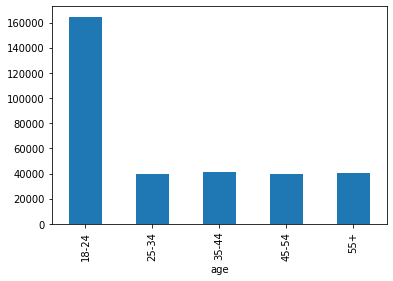

In [29]:
df4.groupby('age')['amount'].aggregate(sum).plot(kind='bar')

In [30]:
df4['device'].value_counts()

iOS        5375
android    2893
Name: device, dtype: int64

In [31]:
df4.groupby('device')[['amount']].sum()

,amount
device,
android,114747.0
iOS,211157.0


**Bar Plot of Device vs Amount**

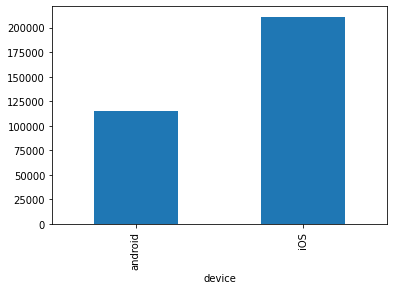

In [32]:
df4.groupby('device')['amount'].aggregate(sum).plot(kind='bar')

In [ ]:
!pip install folium

In [34]:
df6 =df4.groupby(['state','age'])[['amount']].aggregate(sum)
df6

amount
state age          
AK    45-54    82.0
      55+      57.0
AL    18-24   416.0
      25-34   483.0
      35-44   635.0
...             ...
WV    35-44   222.0
      45-54   101.0
      55+      37.0
WY    35-44    83.0
      45-54   107.0

[240 rows x 1 columns]

In [58]:
df5 = df4.groupby('state')['amount'].aggregate(sum)
df5.head()

state
AK      139.0
AL     3352.0
AR     1424.0
AZ     2496.0
CA    16584.0
Name: amount, dtype: float64

**The Total Amount donated in every State:**

In [37]:
import folium
import os
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/'

state_geo = f'{url}/us-states.json'

map = folium.Map(location=[42, -102], zoom_start=5)

folium.Choropleth(
 geo_data=state_geo,
 name='choropleth',
 data=df5,
 columns=['state', 'amount'],
 key_on='feature.id',
 fill_color='YlOrRd',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='Amount according to the states'
).add_to(map)

folium.LayerControl().add_to(map)

map


In [57]:
grouped_by_age_states = df4.groupby(['age','state'])['amount'].sum().reset_index()
grouped_by_age_states.sort_values('amount', ascending=False).head(10)


,age,state,amount
9,18-24,GA,46930.0
35,18-24,OR,43454.0
4,18-24,CO,35241.0
61,25-34,IN,13877.0
207,55+,IN,12436.0
14,18-24,IN,11694.0
109,35-44,IN,11284.0
157,45-54,IN,10952.0
51,25-34,CA,3724.0
148,45-54,CA,3687.0
